In [7]:
import geopandas as gpd
from shapely import wkt
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
gdf = gpd.read_file(r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\data\CommAreas_20250408.geojson")
streets = pd.read_csv(r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\data\transportation_20250415.csv")
homicide = pd.read_csv(r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\clean_data\Homicide_six_hoods.csv")

In [9]:
def plot_chicago_neighborhoods(homicide_data, streets_data, gdf, start_date, end_date):
    streets_data["geometry"] = streets_data["the_geom"].apply(wkt.loads)
    
    streets_gdf = gpd.GeoDataFrame(streets_data, geometry="geometry", crs="EPSG:4326")
    
    streets_gdf = streets_gdf.to_crs(gdf.crs)

    filtered_homicide_data = homicide_data[
        (homicide_data["Date"] >= start_date) & 
        (homicide_data["Date"] <= end_date)
    ]
    annual_homicides = (
        filtered_homicide_data.groupby("Community")
        .size()
        .reset_index(name="Homicide Count")
    )

    annual_homicides["Rank"] = annual_homicides["Homicide Count"].rank(method="first", ascending=False).astype(int)
    selected_neighborhoods = dict(zip(annual_homicides["Community"].str.title(), annual_homicides["Rank"]))

    highlighted_gdf = gdf[gdf['community'].str.title().isin(selected_neighborhoods.keys())]

    xmin, ymin, xmax, ymax = gdf.total_bounds

    fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
    ax.set_facecolor("#f0f0f0")
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    gdf.plot(ax=ax, color="#e0e0e0", edgecolor="#4d4d4d", alpha=0.7, zorder=1)

    highlighted_gdf.plot(ax=ax, color="#ff6347", edgecolor="#4d4d4d", alpha=0.8, zorder=2)

    streets_gdf.plot(ax=ax, color="#1f78b4", linewidth=0.5, alpha=0.7, zorder=3)

    for idx, row in highlighted_gdf.iterrows():
        centroid = row.geometry.centroid
        neighborhood = row['community'].title()
        number = selected_neighborhoods.get(neighborhood)
        ax.text(centroid.x, centroid.y, str(number), fontsize=12, fontweight="bold", color="black", ha="center")

    plt.title(f"Chicago Most Violent Neighborhoods {start_date} - {end_date}", fontsize=16, weight="bold")
    plt.axis("off")

    ax.annotate("N", xy=(0.98, 0.95), xycoords="axes fraction", fontsize=12, fontweight="bold")
    ax.arrow(0.98, 0.94, 0, -0.05, head_width=0.02, head_length=0.04, fc="black", ec="black")

    ax.plot([xmin + (xmax - xmin) * 0.1, xmin + (xmax - xmin) * 0.2], [ymin + (ymax - ymin) * 0.05] * 2, color='black', linewidth=2)
    ax.text(xmin + (xmax - xmin) * 0.15, ymin + (ymax - ymin) * 0.06, '500 m', fontsize=10, ha='center')

    sorted_neighborhoods = sorted(selected_neighborhoods.items(), key=lambda x: x[1], reverse=False)
    legend_labels = [f"{num}: {name}" for name, num in sorted_neighborhoods]
    legend_text = "\n".join(legend_labels)
    plt.annotate(legend_text, xy=(0.01, 0.02), xycoords="figure fraction", fontsize=10, ha="left", va="bottom")

    plt.show()

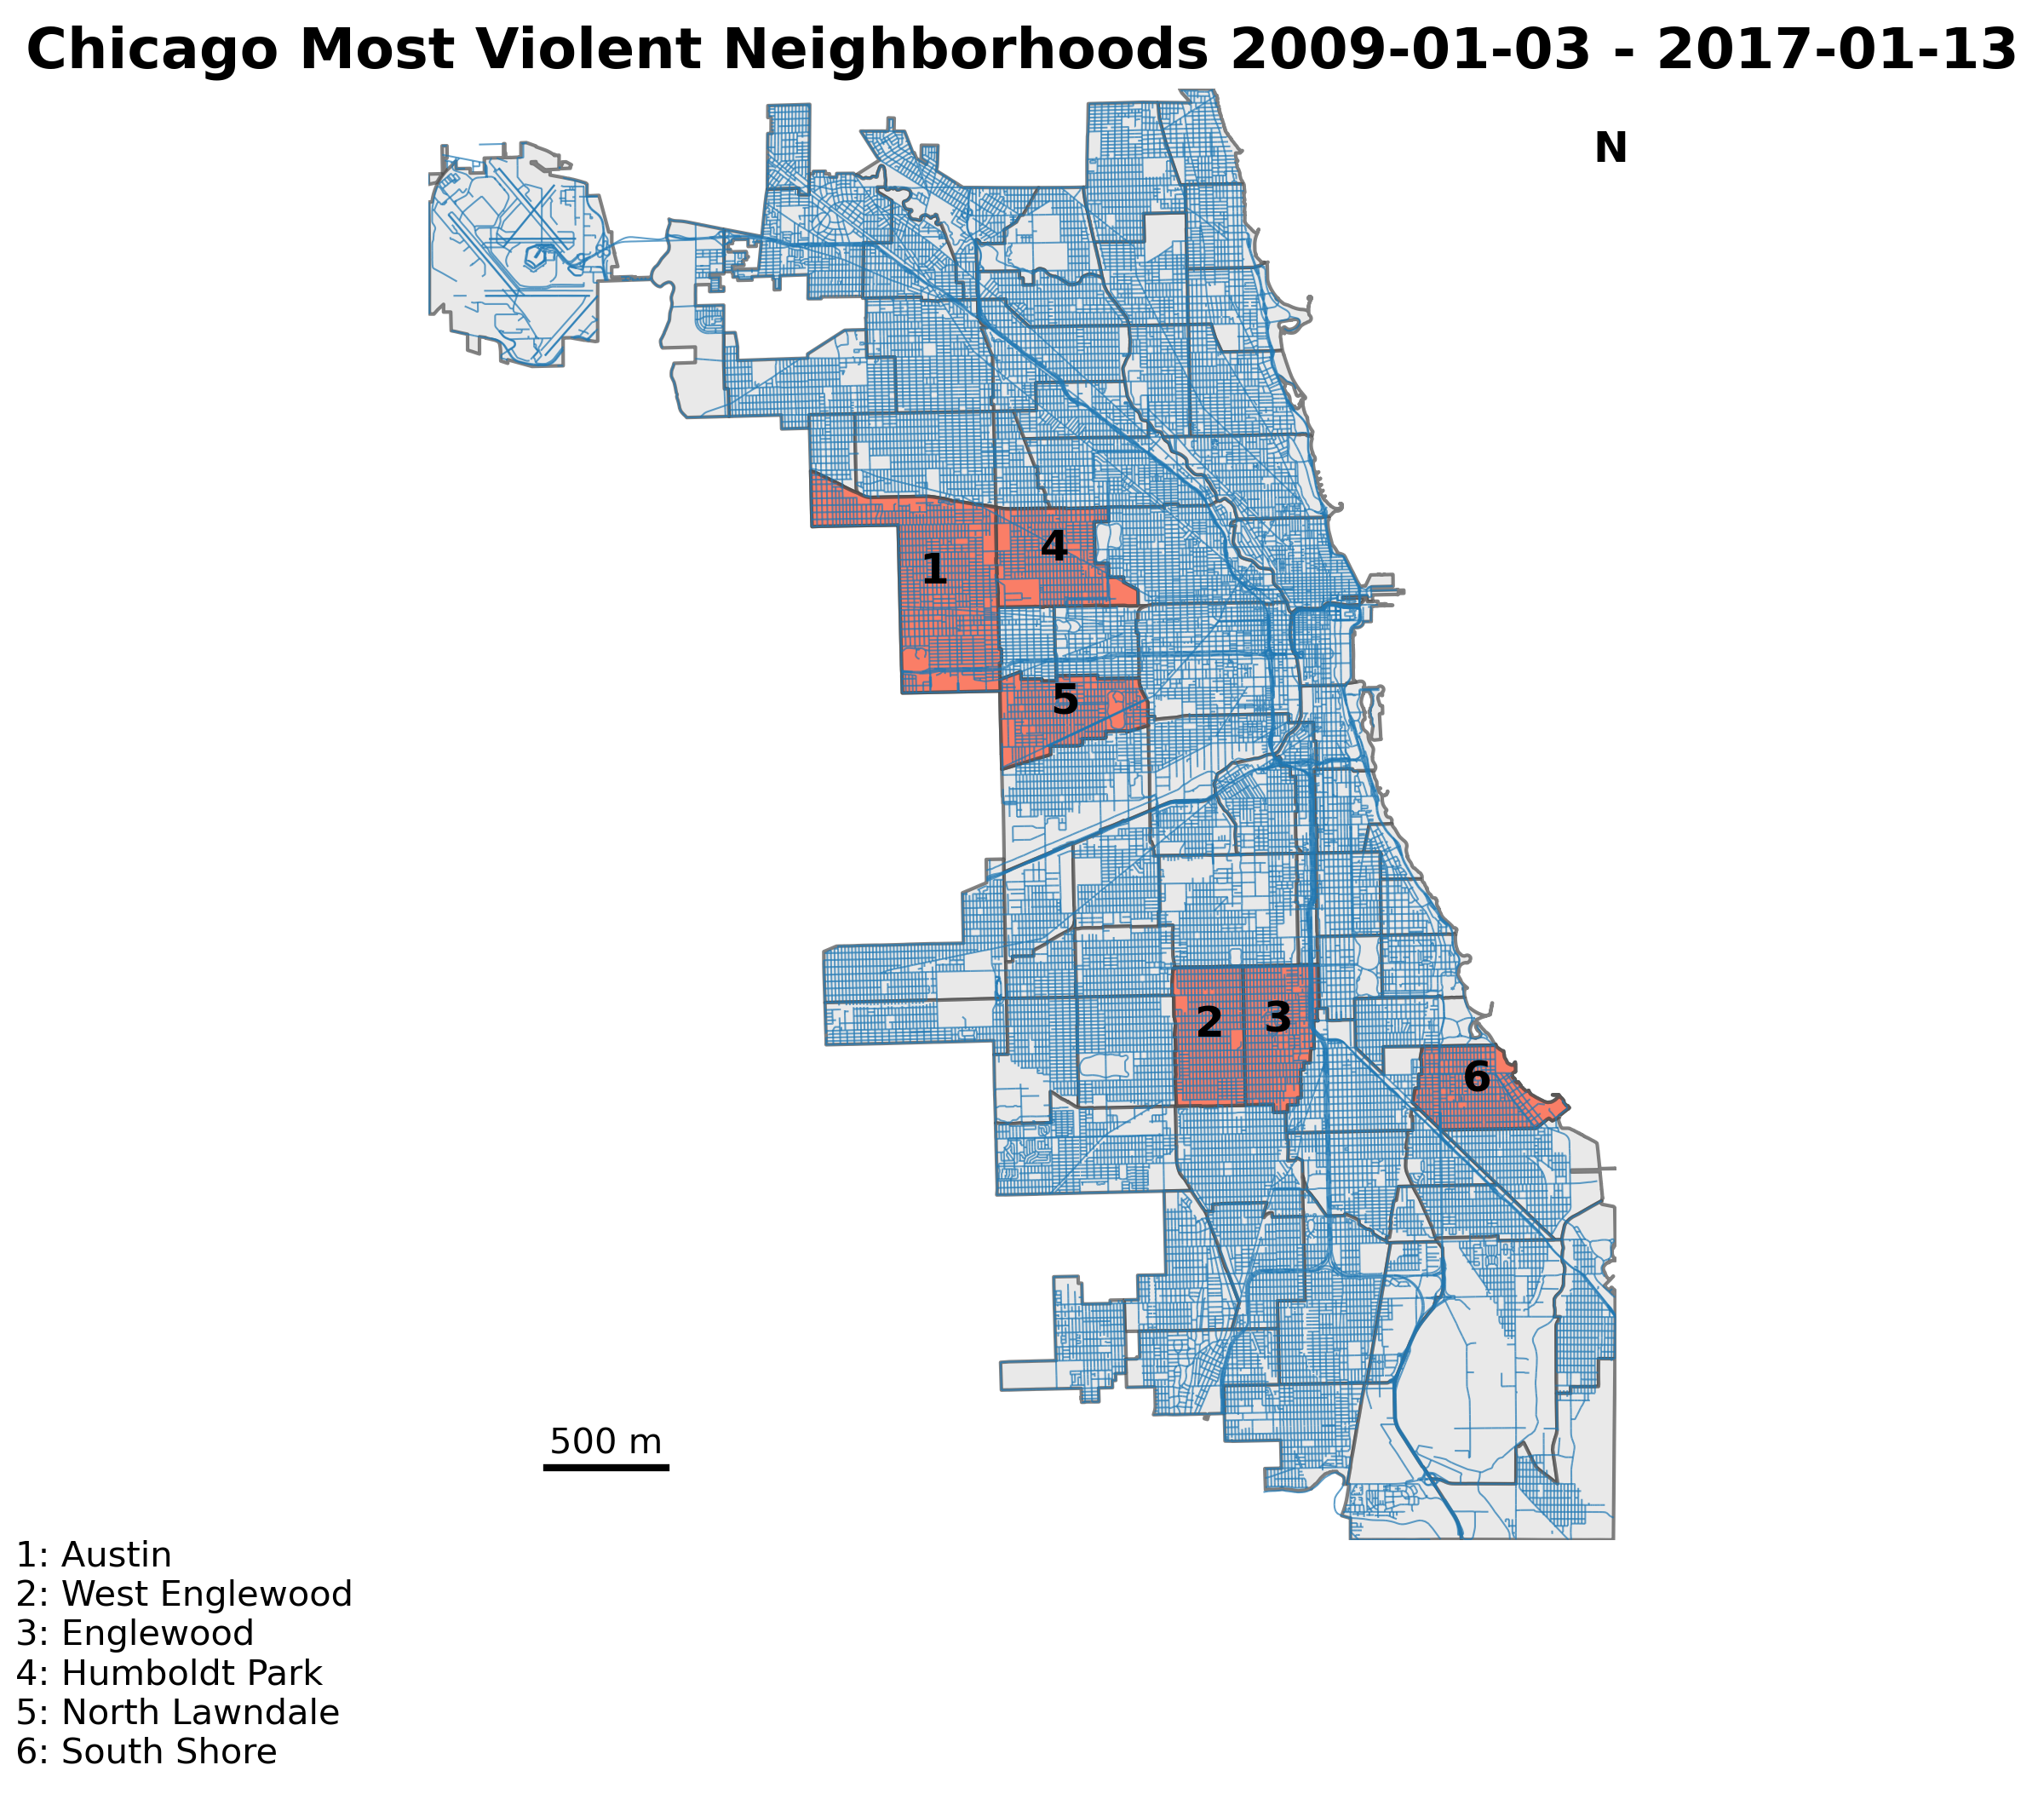

In [10]:
plot_chicago_neighborhoods(homicide, streets, gdf, "2009-01-03", "2017-01-13")

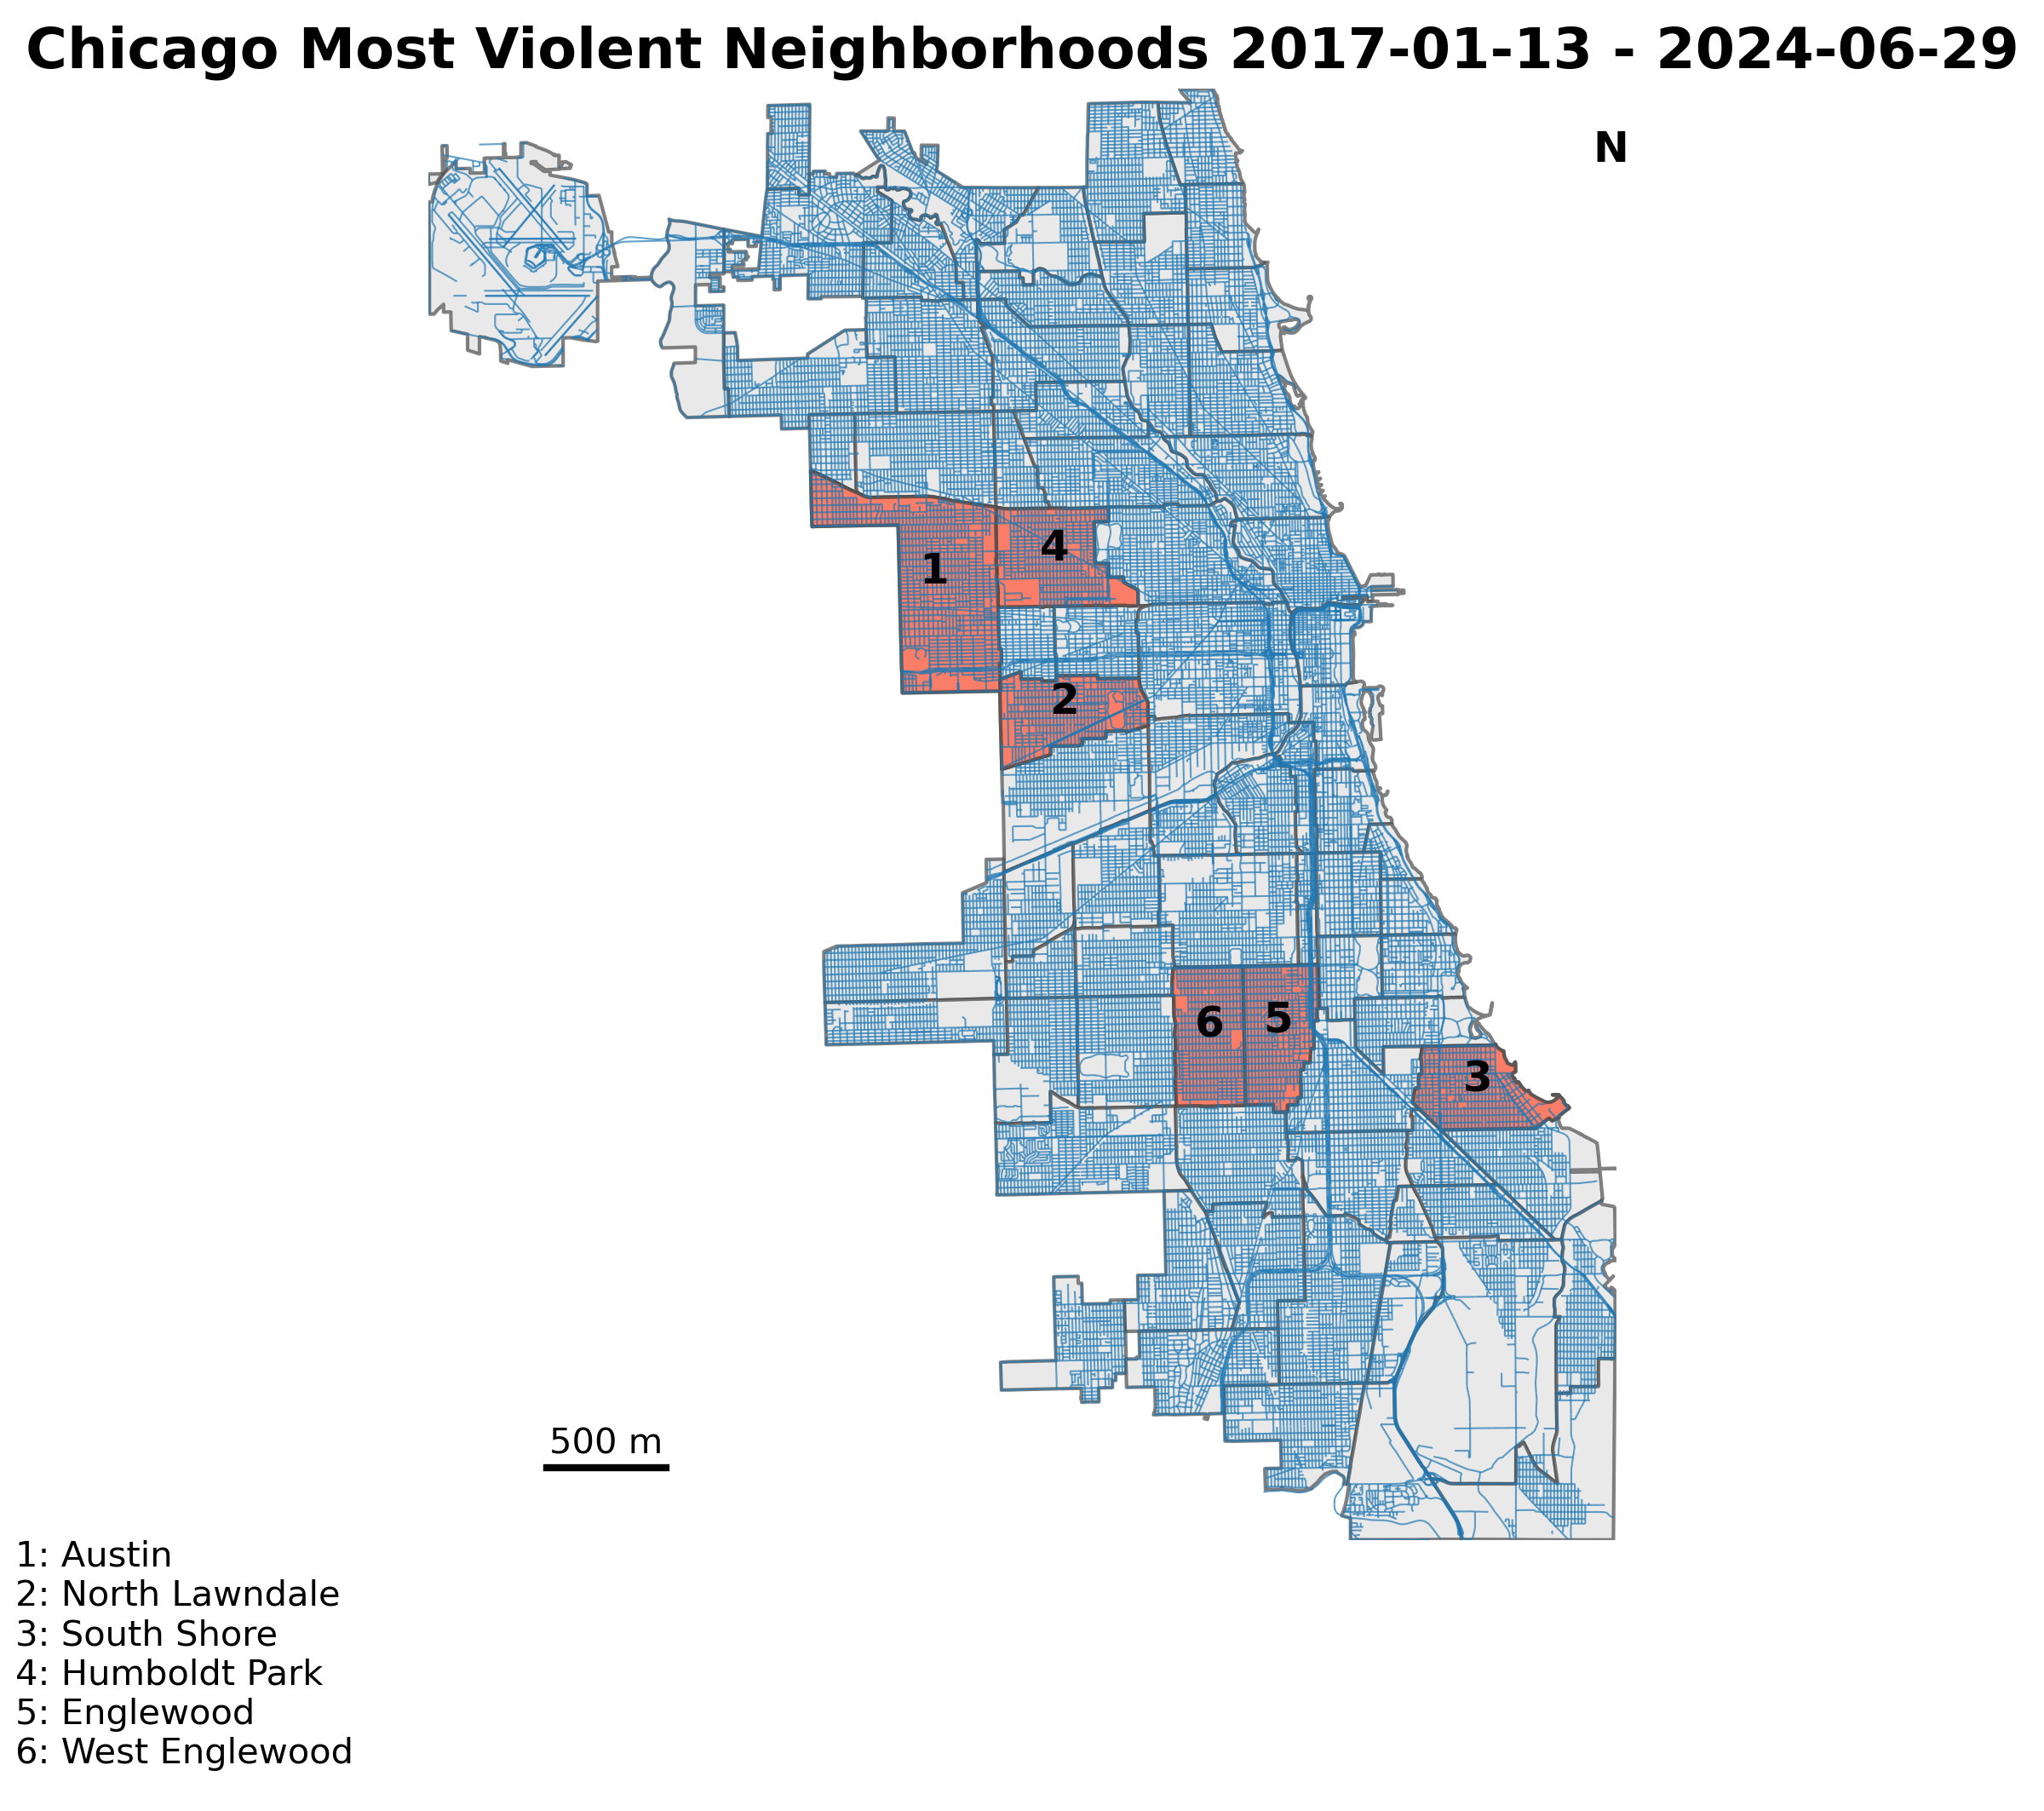

In [11]:
plot_chicago_neighborhoods(homicide, streets, gdf, "2017-01-13", "2024-06-29")

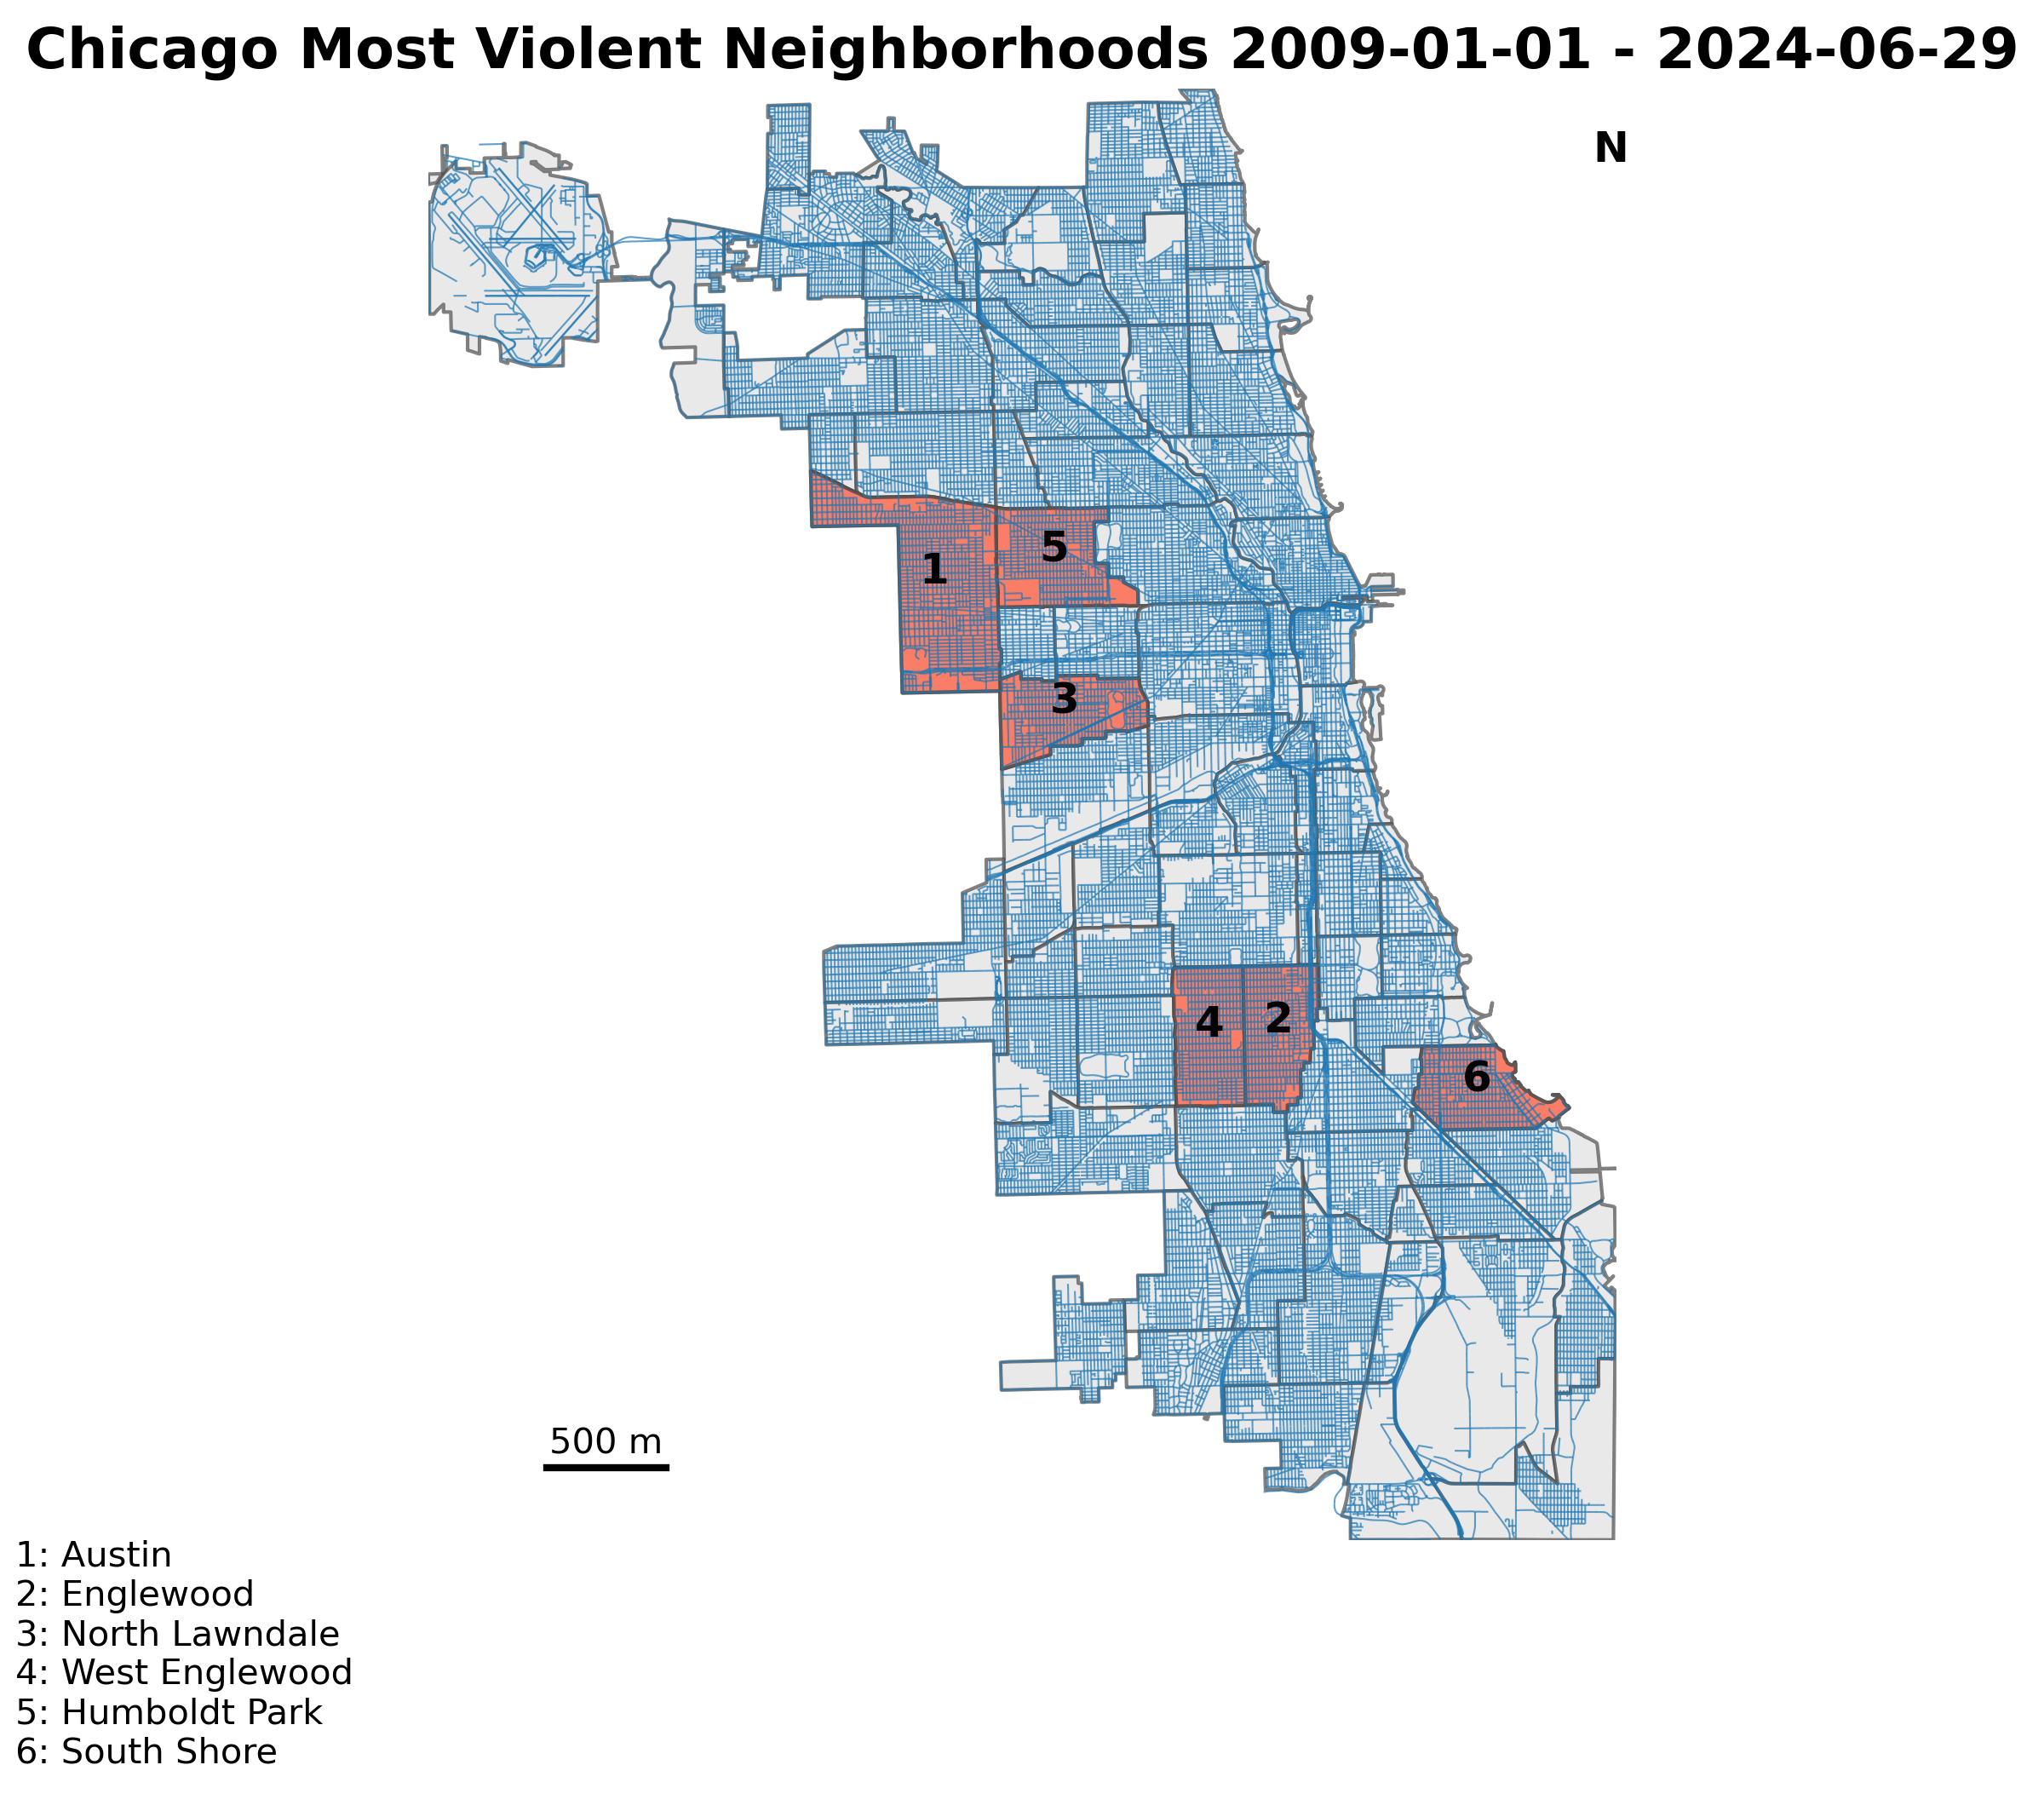

In [12]:
plot_chicago_neighborhoods(homicide, streets, gdf, "2009-01-01", "2024-06-29")